In [8]:
import mne
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import os
import re

# Multiprocessing
import deepgraph as dg
from multiprocessing import Pool
from nancorrmp.nancorrmp import NaNCorrMp
import matplotlib.pyplot as plt




In [2]:
os.listdir("./DataBase")

['SETA', 'SETB', 'SETC', 'SETD']

In [3]:

def get_eeg_file(): 
  rootdir = "./DataBase/"
  sets = os.listdir(rootdir)
  regex = re.compile('(.*out$)')
  dic = []

  for set in sets: 
    for root, dirs, files in os.walk(rootdir+set):
      for file in files:
        if regex.match(file):
          ob = {
            "UID" : file[:-4],
            "set" : set, 
            "filename" : file
          }
          dic.append(ob)
  return dic

In [4]:
df = pd.DataFrame(get_eeg_file())
df.head()

,UID,set,filename
0,eeg20o1,SETA,eeg20o1.out
1,eeg21o1,SETA,eeg21o1.out
2,eeg22o1,SETA,eeg22o1.out
3,eeg23o1,SETA,eeg23o1.out
4,eeg24o1,SETA,eeg24o1.out


In [5]:
raw = np.loadtxt("DataBase\SETD\ec0101.out")
raw.shape

(1024, 19)

In [23]:
corr = NaNCorrMp.calculate_with_p_value(raw.T,  n_jobs=5)

<AxesSubplot:>

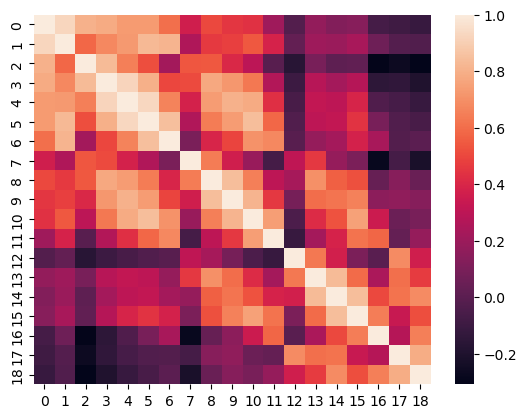

In [24]:
%matplotlib inline


sns.heatmap(corr[0])

In [91]:
# Calculate and store Correlations 
from nancorrmp.nancorrmp import NaNCorrMp
X_corr = np.zeros((X.shape[0], X.shape[1], X.shape[1] ))
p_corr = np.zeros(X_corr.shape)

for i in range(X.shape[0]):
    corr, p = NaNCorrMp.calculate_with_p_value(X[i],  n_jobs=5)
    X_corr[i] += corr
    p_corr[i] += p

NameError: name 'X' is not defined